# Bibliotecas

In [0]:
from skimage import io, color
import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure
import pylab
from PIL import Image
import math
import skimage.measure

# Funciones

## Convolución

In [0]:
def convolve2d(image, kernel):
    kernel = np.flipud(np.fliplr(kernel))  # Flip the kernel
    output = np.zeros_like(image)  # convolution output
    kernel_size = kernel.shape[0]
    border = math.floor(kernel_size / 2) * 2 
    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + border, image.shape[1] + border))
    image_padded[border-1:-1, border-1:-1] = image
    for x in range(image.shape[1]):  # Loop over every pixel of the image
        for y in range(image.shape[0]):
            #element-wise multiplication of the kernel and the image
            output[y, x] = (kernel * image_padded[y:y + kernel_size, x:x + kernel_size]).sum()
    return output

## Mostrar imagen

In [0]:
def showImg(img, cmap=plt.cm.gray):
  plt.imshow(img,cmap)
  plt.axis('off')
  plt.show()

## Fabrica de Kernels

In [0]:
def kernelFactory(kernel_choosed):
  if 'x-sobel' in kernel_choosed:
    kernel = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    return kernel
  elif 'y-sobel' in kernel_choosed:
    kernel = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
    return kernel
  elif 'sobel' in kernel_choosed:
    kernel = np.array([[-2,-2,0],[-2,0,2],[0,2,2]])
    return kernel
  elif 'gaussian' in kernel_choosed:
    kernel = 1/16 * np.array([[1,2,1],[2,4,2],[1,2,1]])
    return kernel
  elif 'laplace' in kernel_choosed:
    kernel = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
    return kernel
  elif 'uniform' in kernel_choosed:
    kernel = np.array([[0,1,0],[1,1,1],[0,1,0]])
    return kernel
  elif 'x-prewitt' in kernel_choosed:
    kernel = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
    return kernel
  elif 'y-prewitt' in kernel_choosed:
    kernel = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
    return kernel
  elif 'sharpen' in kernel_choosed:
    kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
    return kernel
  elif 'mykernel' in kernel_choosed:
    kernel = 5 * np.array([[1,4,7,4,1],[4,16,26,16,4],[7,26,41,26,7],[4,16,26,16,4],[1,4,7,4,1]])
    return kernel
  else:
    print("Kernel not found")


## Sub imagen

In [0]:
def subImagen(imagen, x, y, delta):
  sub_imagen = imagen[x:x+delta,y:y+delta]
  return sub_imagen

## ReLU

In [0]:
def ReLU(x,bias=0):
  return max(0,x+bias)

## imgToBin

In [0]:
def imgToBin(image):
  output = np.zeros_like(image)
  for x in range(image.shape[1]):  # Loop over every pixel of the image
    for y in range(image.shape[0]):
      z = image[y, x] 
      if z < 0.5:
        output[y,x] = -1
      else:
        output[y,x] = 1
  return output


## Pooling

In [112]:
def pooling(image, size=2, stride=2,type_pooling='max' ):
  if 'max' in type_pooling:
    pooling_img=skimage.measure.block_reduce(image, (size,stride), np.max)
  else:
    pooling_img=skimage.measure.block_reduce(image, (size,stride), np.mean)
  return pooling_img

image = np.matrix([
                  [1,1,3,1,4,1,10],
                  [1,2,1,1,1,1,10],
                  [1,1,1,1,1,1,10],
                  [5,1,6,1,7,1,10],
                  [1,1,1,1,1,1,10],
                  [1,8,1,9,1,10,10]])
print("Imagen")
print(image)
size = 5
stride = 5
pooling(image,size,stride)

Imagen
[[ 1  1  3  1  4  1 10]
 [ 1  2  1  1  1  1 10]
 [ 1  1  1  1  1  1 10]
 [ 5  1  6  1  7  1 10]
 [ 1  1  1  1  1  1 10]
 [ 1  8  1  9  1 10 10]]


array([[ 7, 10],
       [ 9, 10]])

# Basic operations

## Carga imagen

Height= 216 Width= 326


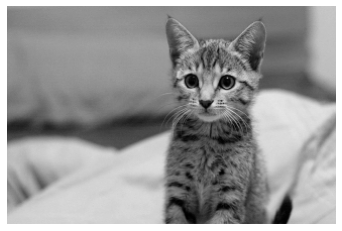

In [42]:
######################################################
#Uncomment the block online or local depending your
#execution environment
######################################################
#Online
local=True
if(local):
  #Offline
  im = Image.open('cat.jpg')
  print("Height=", im.height, "Width=", im.width)
else:
  from google.colab import files
  from io import BytesIO
  uploaded = files.upload()
  im = Image.open(BytesIO(uploaded['cat.jpg']))

showImg(im)


## Imagen en escala de grises

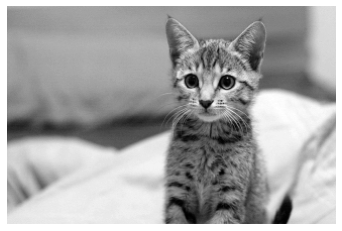

(216, 326)


In [43]:
#Convert to gray scale by averaging the pixel values of three channels
imgarr = np.array(im)
#print(imgarr.shape)
imgarr = color.rgb2gray(imgarr) 

showImg(imgarr)
print(imgarr.shape)
#print(imgarr)

## Padding de la imagen

(218, 328)


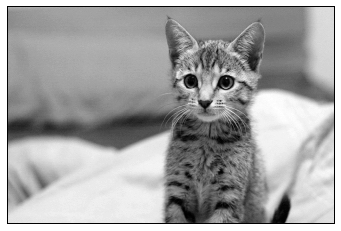

In [44]:
output = np.zeros_like(imgarr)
#print(output)

#Image padding introduces new pixels around the edges of an image
image_padded = np.zeros((imgarr.shape[0] + 2, imgarr.shape[1] + 2))
print(image_padded.shape)
image_padded[1:-1, 1:-1] = imgarr

showImg(image_padded)

# Filtros


## Sobel

[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
(216, 326)


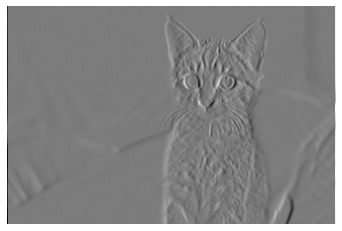

[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]
(216, 326)


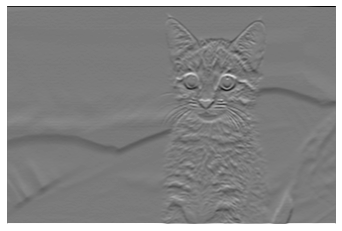

(216, 326)


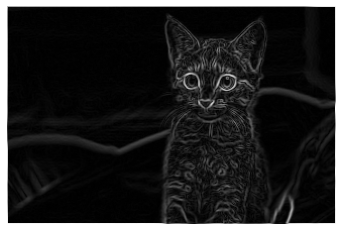

In [45]:
kernel = kernelFactory('x-sobel')
print(kernel)
x_output = convolve2d(imgarr,kernel)
print(x_output.shape)
showImg(x_output)

kernel = kernelFactory('y-sobel')
print(kernel)
y_output = convolve2d(imgarr,kernel)
print(y_output.shape)
showImg(y_output)

outputFinal = np.power(np.power(x_output,2)+np.power(y_output,2),0.5)
print(outputFinal.shape)
showImg(outputFinal)

#kernel = kernelFactory('sobel')
#print(kernel)
#sobel_output = convolve2d(imgarr,kernel)
#print(sobel_output.shape)
#showImg(sobel_output)


## Prewitt

[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]
(216, 326)


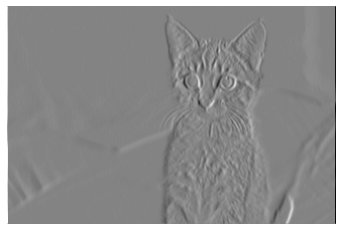

[[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]
(216, 326)


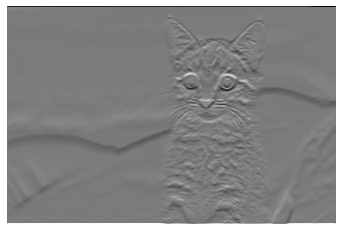

(216, 326)


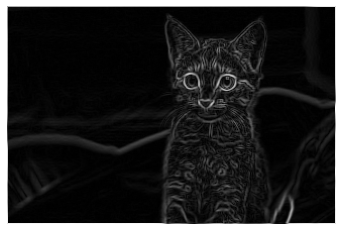

In [46]:
kernel = kernelFactory('x-prewitt')
print(kernel)
x_output = convolve2d(imgarr,kernel)
print(x_output.shape)
showImg(x_output)

kernel = kernelFactory('y-prewitt')
print(kernel)
y_output = convolve2d(imgarr,kernel)
print(y_output.shape)
showImg(y_output)

outputFinal = np.power(np.power(x_output,2)+np.power(y_output,2),0.5)
print(outputFinal.shape)
showImg(outputFinal)

## Gausiano

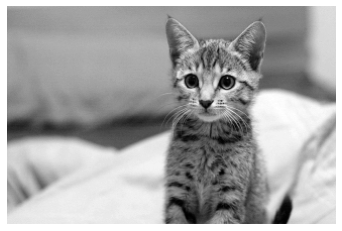

[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]


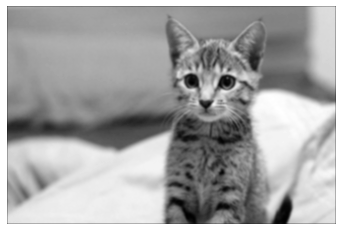

In [47]:
showImg(imgarr)
kernel = kernelFactory('gaussian')
print(kernel)
gauss_output = convolve2d(imgarr,kernel)
showImg(gauss_output)

## Laplace

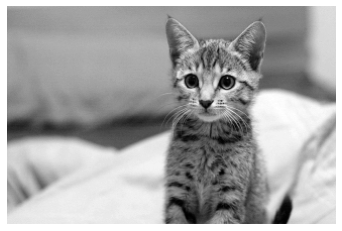

[[ 0 -1  0]
 [-1  4 -1]
 [ 0 -1  0]]


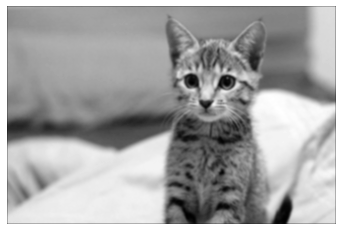

In [48]:
showImg(imgarr)
kernel = kernelFactory('laplace')
print(kernel)
laplace_output = convolve2d(imgarr,kernel)
showImg(gauss_output)

## Uniform

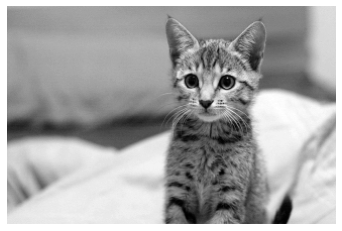

[[0 1 0]
 [1 1 1]
 [0 1 0]]


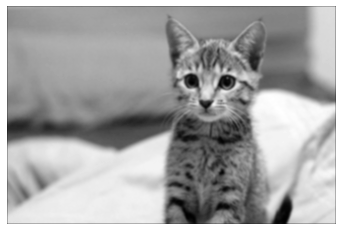

In [49]:
showImg(imgarr)
kernel = kernelFactory('uniform')
print(kernel)
laplace_output = convolve2d(imgarr,kernel)
showImg(gauss_output)

## My Kernel

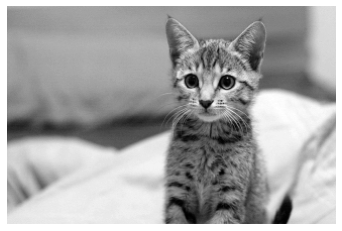

[[  5  20  35  20   5]
 [ 20  80 130  80  20]
 [ 35 130 205 130  35]
 [ 20  80 130  80  20]
 [  5  20  35  20   5]]


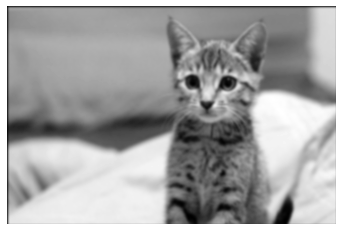

In [50]:
showImg(imgarr)
kernel = kernelFactory('mykernel')
print(kernel)
mykernel_output = convolve2d(imgarr,kernel)
showImg(mykernel_output)

# Sub Imagen

## Ojo

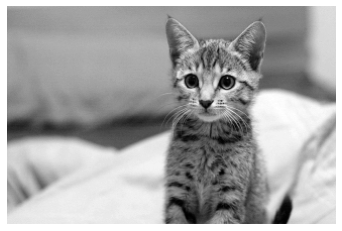

(216, 326)


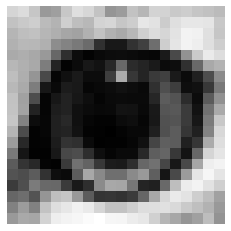

(20, 20)


In [51]:
showImg(imgarr)
print(outputFinal.shape)
ojo = subImagen(imgarr, 65, 208, 20)
showImg(ojo)
print(ojo.shape)
#print(ojo)

## Nariz

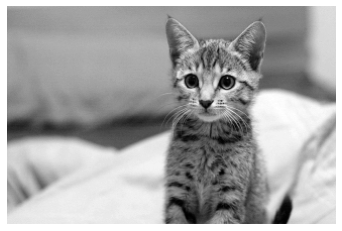

(216, 326)


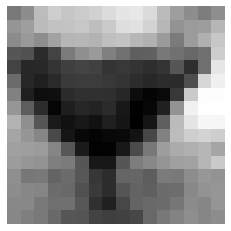

(16, 16)


In [52]:
showImg(imgarr)
print(outputFinal.shape)
nariz = subImagen(imgarr, 90, 190, 16)
showImg(nariz)
print(nariz.shape)

## Cebeza

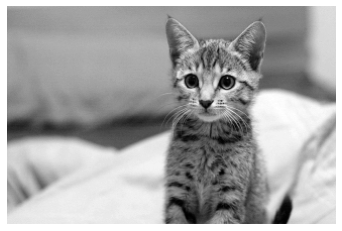

(216, 326)


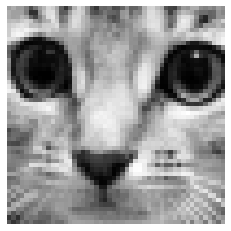

(50, 50)


In [53]:
showImg(imgarr)
print(outputFinal.shape)
cabeza = subImagen(imgarr, 60, 175, 50)
showImg(cabeza)
print(cabeza.shape)

# Convoluación

## Convolución con ojo

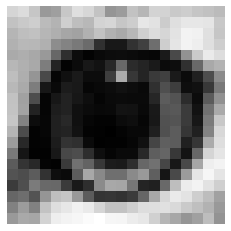

(20, 20)


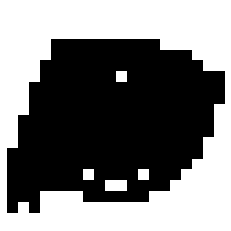

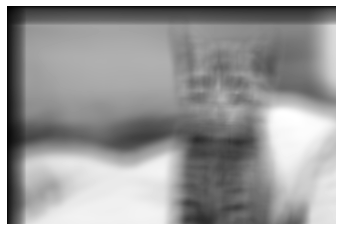

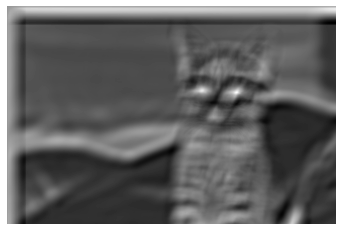

In [54]:
showImg(ojo)
print(ojo.shape)
ojobinario= imgToBin(ojo)
showImg(ojobinario)
convolucion_ojal = convolve2d(imgarr,ojo)
convolucion_ojo_binario = convolve2d(imgarr,ojobinario)
showImg(convolucion_ojal)
showImg(convolucion_ojo_binario)
#print(convolucion_ojal)

## Convolución con nariz

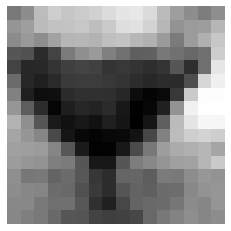

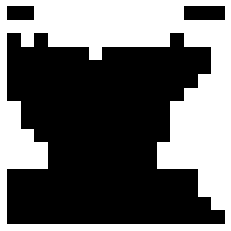

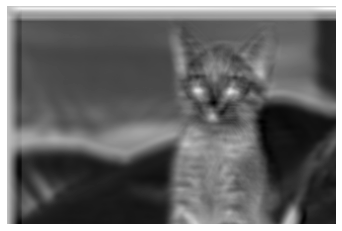

In [55]:
showImg(nariz)
nariz_binaria = imgToBin(nariz)
showImg(nariz_binaria)
convolucion_nariz = convolve2d(imgarr,nariz_binaria)
showImg(convolucion_nariz)

## Convoluación cabeza

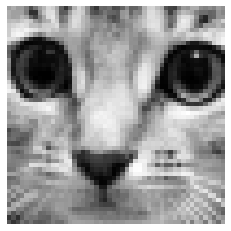

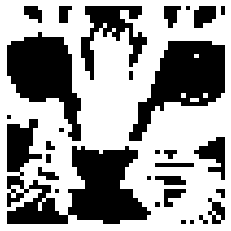

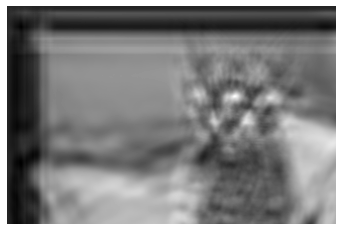

In [56]:
showImg(cabeza)
cabeza_binaria = imgToBin(cabeza)
showImg(cabeza_binaria)
convolucion_cabeza = convolve2d(imgarr,cabeza_binaria)
showImg(convolucion_cabeza)

# ReLu 


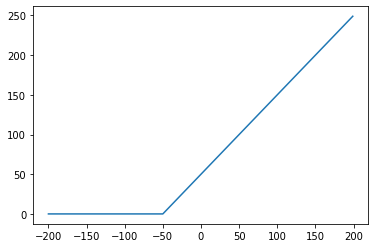

In [57]:
from pylab import *
x = range(-200,200) 
y = np.array([])
bias = 50
for a in x:
  y = np.append(y,ReLU(a,bias))
#print("y",y)
plot(x,y)

## ReLU - Ojo


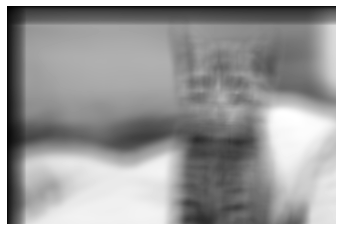

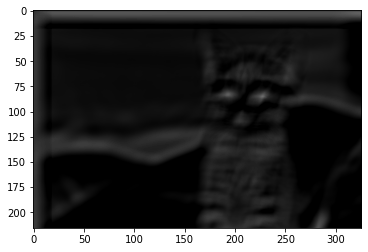

In [67]:
showImg(convolucion_ojal)
relu_ojo = np.zeros_like(convolucion_ojal) 
#print(convolucion_ojal)
bias = 50 
for x in range(convolucion_ojal.shape[1]):  # Loop over every pixel of the image
  for y in range(convolucion_ojal.shape[0]):
    relu_ojo[y, x] = ReLU(convolucion_ojo_binario[y,x],bias)
#showImg(output)
#plt.savefig('data/relu_ojo_100.png')
plt.imshow(relu_ojo, cmap='gray', vmin=0, vmax=255)
#print(output)

## ReLU - Nariz

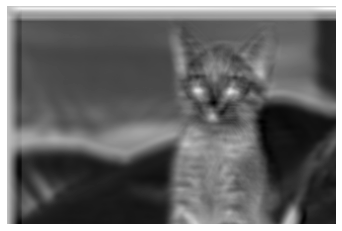

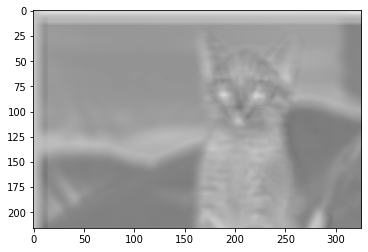

In [70]:
showImg(convolucion_nariz)
relu_nariz = np.zeros_like(convolucion_nariz) 
#print(convolucion_ojal)
bias = 200
for x in range(convolucion_nariz.shape[1]):  # Loop over every pixel of the image
  for y in range(convolucion_nariz.shape[0]):
    relu_nariz[y, x] = ReLU(convolucion_nariz[y,x],bias)
#showImg(output)
#plt.savefig('data/relu_nariz_200.png')
plt.imshow(relu_nariz, cmap='gray', vmin=0, vmax=255)
#print(output)

## ReLU - Cabeza

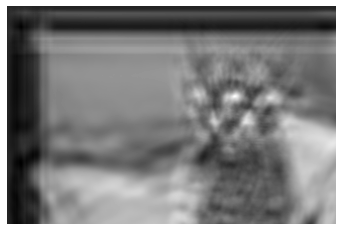

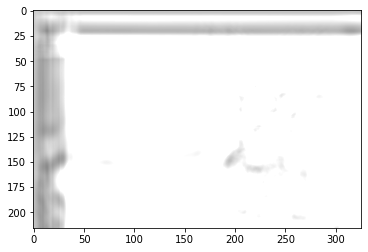

In [69]:
showImg(convolucion_cabeza)
relu_cabeza = np.zeros_like(convolucion_cabeza) 
#print(convolucion_ojal)
bias = 200
for x in range(convolucion_cabeza.shape[1]):  # Loop over every pixel of the image
  for y in range(convolucion_cabeza.shape[0]):
    relu_cabeza[y, x] = ReLU(convolucion_cabeza[y,x],bias)
#showImg(output)
#plt.savefig('data/relu_cabeza_200.png')
plt.imshow(relu_cabeza, cmap='gray', vmin=0, vmax=255)
#print(output)

# Pooling Stage

## Pooling ojo

(216, 326)


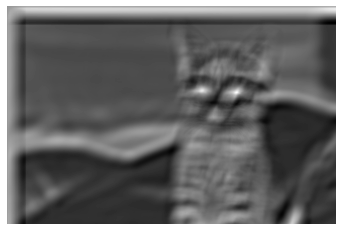

(72, 163)


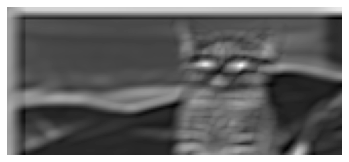

In [119]:
print(convolucion_ojo_binario.shape)
showImg(convolucion_ojo_binario)

#plt.imshow(convolucion_ojo_binario)
#plt.show()

pooling_ojo = pooling(convolucion_ojo_binario,3,2,"max")
print(pooling_ojo.shape)
showImg(pooling_ojo)

#plt.imshow(pooling_ojo)
#plt.show()

## Pooling nariz

(216, 326)


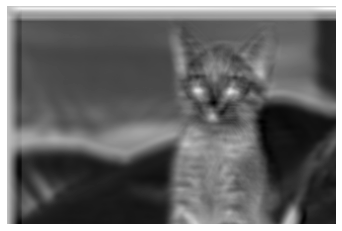

(72, 163)


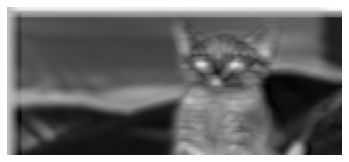

In [113]:
print(convolucion_nariz.shape)
showImg(convolucion_nariz)

pooling_nariz = pooling(convolucion_nariz,3,2,"max")
print(pooling_nariz.shape)
showImg(pooling_nariz)

## Pooling cabeza

(216, 326)


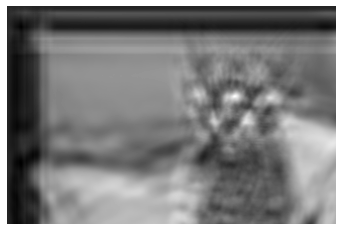

(72, 163)


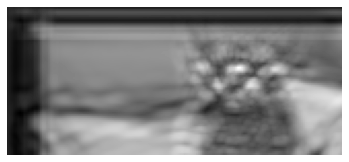

In [114]:
print(convolucion_cabeza.shape)
showImg(convolucion_cabeza)

pooling_cabeza = pooling(convolucion_cabeza,3,2,"max")
print(pooling_cabeza.shape)
showImg(pooling_cabeza)